In [1]:
import tensorflow as tf

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [124]:
X,y=make_blobs(centers=2,random_state=42)

In [125]:
X=tf.constant(X,dtype=tf.float64)
y=tf.constant(y.reshape(-1,1),dtype=tf.float64)

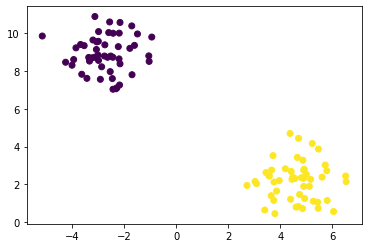

In [126]:
plt.scatter(X[:,0],X[:,1],c=y.numpy().flatten())

In [152]:
W=tf.Variable(tf.zeros([X.shape[1],1],dtype=np.float64))
b=tf.Variable(0.0,dtype=tf.float64)

In [148]:
lr=0.8
max_step=10

In [187]:
@tf.function
def fun(X,y):
    with tf.GradientTape() as tape:
        z=tf.matmul(X,W)+b
        print(z)
        yhat=tf.sigmoid(z)
        error=-((y*tf.math.log(yhat)) + (1-y)*(tf.math.log(1-yhat)))
        loss=tf.reduce_mean(error)
        
    dW ,db=tape.gradient(loss ,[W,b])
    W.assign_sub(dW*lr)
    b.assign_sub(db*lr)
    
    return(loss)

In [188]:
for i in range(max_step):
    print(fun(X,y))

Tensor("add:0", shape=(100, 1), dtype=float64)
tf.Tensor(0.019809119858019242, shape=(), dtype=float64)
tf.Tensor(0.013813337028090395, shape=(), dtype=float64)
tf.Tensor(0.010706867916422294, shape=(), dtype=float64)
tf.Tensor(0.008786515698828833, shape=(), dtype=float64)
tf.Tensor(0.00747457656032655, shape=(), dtype=float64)
tf.Tensor(0.00651812312701401, shape=(), dtype=float64)
tf.Tensor(0.005788159081518909, shape=(), dtype=float64)
tf.Tensor(0.005211738958642817, shape=(), dtype=float64)
tf.Tensor(0.004744399623666321, shape=(), dtype=float64)
tf.Tensor(0.004357444047899976, shape=(), dtype=float64)


In [165]:
W

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[ 1.79626755],
       [-1.08633112]])>

In [166]:
z=tf.matmul(X,W)+b

In [184]:
tf.sigmoid(z[2])

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([2.23765807e-07])>

In [183]:
z[2]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([-15.31266561])>

[3.47205752e-07]


In [181]:
## 2.78E-04 ≡ 2.78×10−4 = 0.000278 hours.